In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats
import math
import numpy as np
import sys
import seaborn as sns
import matplotlib

def get_query_index_fastani_log(f):
    sketch_times = 0
    map_times = 0
    for line in open(f, 'r'):
        if 'sketching the reference' in line:
            sketch_times += float(line.split(':')[-1].split()[0])
        if 'spent mapping fragments' in line:
            map_times += float(line.split(':')[-1].split()[0])

    return map_times/(map_times + sketch_times)



def get_times_from_benchmark(f):
    counter = 0
    for line in open(f,'r'):
        if counter == 0:
            counter += 1
            continue
        else:
            spl = line.split('\t')
            wall_time = float(spl[0])
            max_rss = round(float(spl[2])/1000, 2)
            cpu_time = float(spl[-1])
            if cpu_time > 1:
                cpu_time = int(cpu_time)
            return [wall_time, cpu_time, max_rss]

def get_times_from_usrbintime(f):
    user_time = 0
    cpu_time = 0
    max_rss = 0
    wall_time = 0
    for line in open(f, 'r'):
        if 'User time' in line:
            user_time = float(line.split(':')[-1].rstrip())
        elif 'System time' in line:
            system_time = float(line.split(':')[-1].rstrip())
            cpu_time = user_time + system_time
        elif 'Maximum resident' in line:
            max_rss = round(float(line.split(':')[-1].rstrip())/1000000,2)
        elif 'wall clock' in line:
            str_time = line.split()[-1].rstrip()
            str_time = str_time.split(':');
            if len(str_time) == 3:
                wall_time = float(str_time[0]) * 3600 + float(str_time[1]) * 60 + float(str_time[2].rstrip())
            else:
                wall_time = float(str_time[0]) * 60 + float(str_time[1].rstrip())
    if cpu_time > 1:
        cpu_time = int(cpu_time)

    return [wall_time, cpu_time, max_rss]

     

# Change these parameters to get cpu-time, wall-time, memory vs runtime usage

In [7]:
##Change these parameters to get different plots. 
wall = True
time = True
log_scale = False
cmap = sns.color_palette("muted")

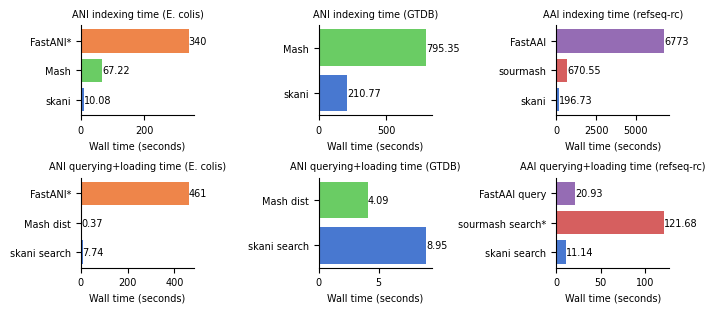

In [9]:
cm = 1/2.54  # centimeters in inches
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
if time:
    plt.figure(figsize=(18*cm, 8*cm))
else:
    plt.figure(figsize=(18*cm, 4*cm))


#plt.style.use(['nature'])
#plt.style.reload_library()


skani_D3_index = "..//times/skani_D3_sketch.time"
skani_D3_search = "..//times/skani_D3_query.time"
fastani_D3 = "..//times/fastani_D3.time"
fastani_D3_log_file = "..//times/fastani_D3_log.txt"
mash_D3 = "..//times/mash_D3.time"
mash_D3_index = "..//times/mash_D3_sketch.time"
mash_D3_dist = "..//times/mash_D3_dist.time"

skani_time_index = get_times_from_usrbintime(skani_D3_index)
skani_time_search = get_times_from_usrbintime(skani_D3_search)
fastani_time = get_times_from_usrbintime(fastani_D3)
fastani_time_ratio= get_query_index_fastani_log(fastani_D3_log_file)
mash_time_index = get_times_from_usrbintime(mash_D3_index)
mash_time_dist = get_times_from_usrbintime(mash_D3_dist)
rot = 0

if time:
    colours = [cmap[0], cmap[2], cmap[1]]

    wall_times_index = [skani_time_index[0], mash_time_index[0], int(fastani_time[0] * (1 - fastani_time_ratio)), ]
    cpu_times_index = [skani_time_index[1], mash_time_index[1],  int(fastani_time[1] * (1-fastani_time_ratio)), ]
    labels = ["skani","Mash", "FastANI*"]
    ax = plt.subplot(2,3,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if wall:
        bars = plt.barh([1,2,3], wall_times_index, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("Wall time (seconds)")
    else:
        bars = plt.barh([1,2,3], cpu_times_index, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("CPU time (seconds)")
    plt.bar_label(bars)
    #plt.hlines(y=skani_time_index[1] + skani_time_dist[1], xmin=1.5, xmax=3.5, linewidth=2, color=cmap[0], label = 'mash total time')
    #plt.hlines(y=mash_time_index[1] + mash_time_dist[1], xmin=4.5, xmax=6.5, linewidth=2, color=cmap[2], label = 'skani total time')
    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.title("ANI indexing time (E. colis)", fontsize = 7 )

    labels = ["skani search",  "Mash dist", "FastANI*"]
    ax = plt.subplot(2,3,4)
    wall_times_search= [skani_time_search[0], mash_time_dist[0], int(fastani_time[0] * fastani_time_ratio), ]
    cpu_times_search= [skani_time_search[1], mash_time_dist[1],  int(fastani_time[1] * fastani_time_ratio), ]

    colours = [cmap[0],  cmap[2], cmap[1]]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if wall:
        bars = plt.barh([1,2,3], wall_times_search, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("Wall time (seconds)")
    else:
        bars = plt.barh([1,2,3], cpu_times_search, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("CPU time (seconds)")
    plt.bar_label(bars)
    #ax.set_xlim(0,query_lim)
    plt.title("ANI querying+loading time (E. colis)", fontsize = 7 )

else:
    ax = plt.subplot(1,3,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    labels = ["skani search",  "Mash dist", "FastANI*"]
    colours = [cmap[0], cmap[2], cmap[1]]
    memory_usage_all = [skani_time_search[2],  mash_time_dist[2], fastani_time[2]]
    bars = plt.barh([1,2,3], memory_usage_all, log=log_scale, label=labels, tick_label = labels , color = colours)
    plt.bar_label(bars)

    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.xlabel("Peak RAM (GB)") 
    plt.title("ANI peak memory (E. coli)", fontsize = 7)


    #ax = plt.subplot(2,3,4)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.yaxis.set_ticks_position('left')
    #ax.xaxis.set_ticks_position('bottom')
    #labels = ["skani search", "skani dist", "Mash", "FastANI*"]
    #colours = [cmap[0],cmap[0],cmap[2], cmap[1]]
    #memory_usage_all = [skani_time_search[2], skani_time_dist[2], mash_time_index[2], fastani_time[2]]
    #bars = plt.barh([1,2,3,4], memory_usage_all, log=log_scale, label=labels, tick_label = labels , color = colours)
    #plt.bar_label(bars)
    #plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    #plt.xlabel("Peak RAM (GB)") 
    #plt.title("ANI peak memory query (E. coli)", fontsize = 7)


skani_aai_refseq_index = "../times/skani_refseq_sketch.time"
skani_aai_refseq_search = "../times/skani_refseq_query.time"
fastaai_refseq_index = "../times/fastaai_refseq_sketch.time"
fastaai_refseq_dist = "../times/fastaai_refseq_dist.time"
sourmash_refseq_index = "../times/sourmash_refseq_sketch.time"
sourmash_refseq_dist = "../times/sourmash_refseq_search.time"

skani_aai_index = get_times_from_usrbintime(skani_aai_refseq_index)
skani_aai_search = get_times_from_usrbintime(skani_aai_refseq_search)
fastaai_index= get_times_from_usrbintime(fastaai_refseq_index)
fastaai_dist= get_times_from_usrbintime(fastaai_refseq_dist)
sourmash_index = get_times_from_usrbintime(sourmash_refseq_index)
sourmash_dist = get_times_from_usrbintime(sourmash_refseq_dist)

if time:
    colours = [cmap[0],   cmap[3], cmap[4], ]
    wall_times_index = [ skani_aai_index[0],   sourmash_index[0], fastaai_index[0],]
    cpu_times_index = [ skani_aai_index[1],   sourmash_index[1],  fastaai_index[1],]
    labels = ["skani", "sourmash", "FastAAI"]
    ax = plt.subplot(2,3,3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    if wall:
        bars = plt.barh([1,2,3], wall_times_index, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("Wall time (seconds)")
    else:
        bars = plt.barh([1,2,3], cpu_times_index, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("CPU time (seconds)")
    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.title("AAI indexing time (refseq-rc)", fontsize = 7)
    plt.bar_label(bars)

    colours = [cmap[0], cmap[3], cmap[4], ]
    labels = ["skani search",  "sourmash search*", "FastAAI query"]
    ax = plt.subplot(2,3,6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    wall_times_search = [ skani_aai_search[0],  sourmash_dist[0], fastaai_dist[0],]
    cpu_times_search = [ skani_aai_search[1],  sourmash_dist[1],  fastaai_dist[1],]

    if wall:
        bars = plt.barh([1,2,3], wall_times_search, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("Wall time (seconds)")
    else:
        bars = plt.barh([1,2,3], cpu_times_search, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("CPU time (seconds)")
    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.title("AAI querying+loading time (refseq-rc)", fontsize = 7)
    #ax.set_xlim(0,query_lim)
    plt.bar_label(bars)



else:
    colours = [cmap[0],  cmap[3], cmap[4]]
    memory_usage_all = [skani_aai_search[2],  sourmash_dist[2], max(fastaai_index[2],fastaai_dist[2])]
    labels = ["skani search", "sourmash search","FastAAI query"]
    ax = plt.subplot(1,3,3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


    bars = plt.barh([1,2,3], memory_usage_all, log=log_scale, label=labels, tick_label = labels , color = colours)
    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.xlabel("Peak RAM (GB)") 
    plt.bar_label(bars)

    plt.title("AAI peak memory (refseq-rc)", fontsize = 7)

###THIRD PLOT
skani_gtdb_index_file = "../times/skani_gtdb_sketch.time"
skani_gtdb_search_file = "../times/skani_gtdb_query.time"
mash_gtdb_index_file = "../times/mash_gtdb_sketch.time"
mash_gtdb_search_file = "../times/mash_gtdb_dist.time"
fastani_gtdb_log_file = "../times/fastani_gtdb_log.txt"
fastani_gtdb_file = "../times/fastani_gtdb.time"

skani_gtdb_index= get_times_from_usrbintime(skani_gtdb_index_file)
skani_gtdb_search = get_times_from_usrbintime(skani_gtdb_search_file)
mash_gtdb_index = get_times_from_usrbintime(mash_gtdb_index_file)
mash_gtdb_dist = get_times_from_usrbintime(mash_gtdb_search_file)
fastani_gtdb_all = get_times_from_usrbintime(fastani_gtdb_file)
map_to_sketch_ratio = get_query_index_fastani_log(fastani_gtdb_log_file)

if time:
    #colours = [cmap[0],  cmap[2], cmap[1], ]
    colours = [cmap[0],  cmap[2] ]
    wall_times_index = [skani_gtdb_index[0], mash_gtdb_index[0]]
    cpu_times_index = [skani_gtdb_index[1], mash_gtdb_index[1]]
    labels = ["skani", "Mash"]
    ax = plt.subplot(2,3,2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if wall:
        bars = plt.barh([1,2], wall_times_index, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("Wall time (seconds)")
    else:
        bars = plt.barh([1,2], cpu_times_index, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("CPU time (seconds)")
    plt.bar_label(bars)
    #plt.hlines(y=skani_time_index[1] + skani_time_dist[1], xmin=1.5, xmax=3.5, linewidth=2, color=cmap[0], label = 'mash total time')
    #plt.hlines(y=mash_time_index[1] + mash_time_dist[1], xmin=4.5, xmax=6.5, linewidth=2, color=cmap[2], label = 'skani total time')
    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.title("ANI indexing time (GTDB)", fontsize = 7)

    labels = ["skani search", "Mash dist"]
    colours = [cmap[0],cmap[2], ]
    wall_times_search = [skani_gtdb_search[0],  mash_gtdb_dist[0],] #int(fastani_gtdb_all[0] * (map_to_sketch_ratio))]
    cpu_times_search = [skani_gtdb_search[1],   mash_gtdb_dist[1],] #int(fastani_gtdb_all[1] * (map_to_sketch_ratio))]

    ax = plt.subplot(2,3,5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if wall:
        bars = plt.barh([1,2], wall_times_search, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("Wall time (seconds)")
    else:
        bars = plt.barh([1,2], cpu_times_search, log=log_scale, label=labels, tick_label = labels , color = colours)
        plt.xlabel("CPU time (seconds)")
    plt.bar_label(bars)
    #plt.hlines(y=skani_time_index[1] + skani_time_dist[1], xmin=1.5, xmax=3.5, linewidth=2, color=cmap[0], label = 'mash total time')
    #plt.hlines(y=mash_time_index[1] + mash_time_dist[1], xmin=4.5, xmax=6.5, linewidth=2, color=cmap[2], label = 'skani total time')
    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.title("ANI querying+loading time (GTDB)", fontsize = 7)
    #ax.set_xlim(0,query_lim)




else:
    labels = ["skani search",  "Mash dist"]
    colours = [cmap[0],  cmap[2]]
    ax = plt.subplot(1,3,2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    memory_usage_all = [skani_gtdb_search[2],  mash_gtdb_dist[2]]
    bars = plt.barh([0,1], memory_usage_all, log=log_scale, label=labels, tick_label = labels , color = colours)
    #plt.xlim(])


    #plt.bar_label(bars)
    blabel = [str(skani_gtdb_search[2]),str(mash_gtdb_dist[2])]
    plt.bar_label(bars, blabel)

    plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    plt.xlabel("Peak RAM (GB)") 
    plt.title("ANI peak memory (GTDB)", fontsize = 7)


    #labels = ["skani search","skani dist", "Mash"]
    #colours = [cmap[0], cmap[0], cmap[1]]
    #ax = plt.subplot(2,3,5)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.yaxis.set_ticks_position('left')
    #ax.xaxis.set_ticks_position('bottom')

    #memory_usage_all = [skani_gtdb_search[2], skani_gtdb_dist[2], mash_gtdb_search[2]]
    #bars = plt.barh([0,1,2], memory_usage_all, log=log_scale, label=labels, tick_label = labels , color = colours)
    ##plt.xlim(])

    ##plt.bar_label(bars)
    #blabel = [str(skani_gtdb_search[2]), str(skani_gtdb_dist[2]),str( mash_gtdb_search[2])]
    #plt.bar_label(bars, blabel)

    #plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
    #plt.xlabel("Peak RAM (GB)") 
    #plt.title("ANI peak memory query (GTDB)", fontsize = 7)



from matplotlib.offsetbox import AnchoredText
#plt.annotate(s, xy=(0.05, 0.95), xycoords='axes fraction')
if time:
    if wall:
        plt.savefig('figures/runtimes_wall.png', transparent = True, dpi = 600)
    else:
        plt.savefig('figures/runtimes_cpu.png', transparent = True, dpi = 600)
else:
    plt.savefig('figures/memory.png', transparent = True, dpi = 600)

plt.show()